<a href="https://colab.research.google.com/github/tmukayev/Data-Science-projects/blob/main/assigment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import multivariate_normal as mvn

##Data Preparation

In [ ]:
data = pd.read_csv('/content/MNIST_train.csv')

In [ ]:
data

,Unnamed: 0,index,labels,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,0,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,59995,59995,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,59996,59996,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,59997,59997,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,59998,59998,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data.shape

(60000, 787)

In [ ]:
data.head(10)

,Unnamed: 0,index,labels,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,0,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,5,5,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,6,6,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,7,7,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,8,8,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,9,9,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data.columns

Index(['Unnamed: 0', 'index', 'labels', '0', '1', '2', '3', '4', '5', '6',
       ...
       '774', '775', '776', '777', '778', '779', '780', '781', '782', '783'],
      dtype='object', length=787)

In [ ]:
mnist_data = data.drop(['Unnamed: 0','index'], axis=1)

In [ ]:

mnist_data.shape

(60000, 785)

In [ ]:
X = mnist_data.to_numpy()

In [ ]:
X.shape

(60000, 785)

In [ ]:
y = X[:,0]

In [ ]:
y.shape

(60000,)

In [ ]:
y

array([5, 0, 4, ..., 5, 6, 8])

In [ ]:
set(y)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [ ]:
X = X[:,1:]

In [ ]:
X.shape

(60000, 784)

In [ ]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

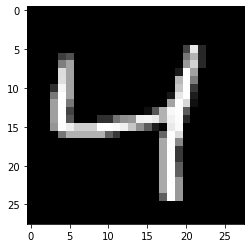

In [ ]:
single_image = X[2, :].reshape(28,28)
plt.imshow(single_image, cmap = 'gray')


# a colormap and a normalization instance
cmap = plt.cm.jet
norm = plt.Normalize(vmin=single_image.min(), vmax=single_image.max())

# map the normalized data to colors
image = cmap(norm(single_image))

# save the image
plt.imsave('test.png', image)

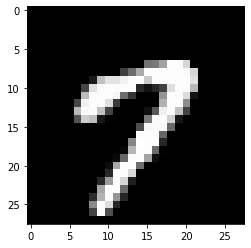

In [ ]:
single_image = X[15, :].reshape(28,28)
plt.imshow(single_image, cmap = 'gray')
plt.imsave('/content/test.png', single_image, cmap=cmap)

##KNN Classifier

In [ ]:
class KNNclassifier():

  def fit(self, X, y):
    self.X = X
    self.y = y

  def predict(self, X, K, epsilon = 1e-3):
    N = len(X)
    y_hat = np.zeros(N)

    for i in range(N):
      dist2 = np.sum((self.X-X[i])**2, axis=1)
      idxt = np.argsort(dist2)[:K]
      gamma_k = 1 / (np.sqrt(dist2[idxt] + epsilon))
      y_hat[i] = np.bincount(self.y[idxt], weights=gamma_k).argmax()

    return y_hat

In [ ]:
knn = KNNclassifier()

In [ ]:
knn.fit(X,y)

## Load test set

In [ ]:
data_test = pd.read_csv('/content/MNIST_test.csv')

In [ ]:
data_test.columns

Index(['Unnamed: 0', 'index', 'labels', '0', '1', '2', '3', '4', '5', '6',
       ...
       '774', '775', '776', '777', '778', '779', '780', '781', '782', '783'],
      dtype='object', length=787)

In [ ]:
data_test = data_test.drop(['Unnamed: 0','index'], axis=1)

In [ ]:
X_test = data_test.to_numpy()

In [ ]:
data_test

,labels,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_test

array([[7, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [4, 0, 0, ..., 0, 0, 0],
       [5, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0]])

In [ ]:
# data_test.to_numpy

In [ ]:
y_test = X_test[:,0]

In [ ]:
X_test = X_test[:,1:]

In [ ]:
y_hat = knn.predict(X_test,5)

In [ ]:
y_hat.shape

(10000,)

In [ ]:
def accuracy(y, y_hat):

  return np.mean(y==y_hat)

In [ ]:
accuracy(y_test, y_hat)

0.9691

##Non - Naive Gauss Bayes Classifier

In [ ]:
from numpy.ma.core import identity
from operator import matmul
class GaussBayes():

  def fit(self, X, y, epsilon = 1e-3):
    self.likelihoods = {}
    self.priors = {}

    self.K = set(y.astype(int))

    for k in self.K:
      X_k = X[y==k,:]
      N_k, D = X_k.shape
      mu_k = X_k.mean(axis=0)
      self.likelihoods[k] = {"mean": X_k.mean(axis=0), "cov": (1/(N_k-1))*np.matmul((X_k-mu_k).T,X_k-mu_k) + epsilon * np.identity(D)}
      self.priors[k] = len(X_k)/len(X)

  def predict(self, X):
    N, D = X.shape
    P_hat = np.zeros((N, len(self.K)))

    for k, l in self.likelihoods.items():
      P_hat[:,k] = mvn.logpdf(X, l["mean"], l["cov"]) + np.log(self.priors[k])

    return P_hat.argmax(axis=1)


In [ ]:
gbayes = GaussBayes()

In [ ]:
gbayes.fit(X,y)

In [ ]:
X_test.shape

(10000, 784)

In [ ]:
y_test.shape

(10000,)

In [ ]:
y_hat2 = gbayes.predict(X_test)

In [ ]:
accuracy(y_test, y_hat2)

0.7532